In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regresor

In [2]:
from sklearn.linear_model import Lasso
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class LassoRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = Lasso
        if params is None:
            self.params = {
                'alpha': 0.2,
                'max_iter': 10000,
                #'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.001,0.01, prior='log-uniform'),
                'max_iter': Integer(100, 1000),
                'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


c:\python_env\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Clasificador

In [3]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

# Instancia de modelos 

In [4]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler



model_reg = LassoRegressor()
Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'Lasso'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [5]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

# Data

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [7]:
X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

In [8]:
# Definir las regiones para cada subconjunto
regiones_1 = [ "Turquia","Europa", "America"]
regiones_2 = ["Turquia","Europa", "America"]

# Filtrar las filas del dataframe por región
df_CN_1 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_1)]
df_CN_2 = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones_2)]

# Seleccionar las columnas correspondientes para cada conjunto
X_CN_1 = df_CN_1[features]
y_CN_1 = df_CN_1["Age"]
ID_CN_1 = df_CN_1["ID_unique"]


X_CN_2 = df_CN_2[features]
y_CN_2 = df_CN_2["Age"]
ID_CN_2 = df_CN_2["ID_unique"]

scaler = StandardScaler()
scaler.fit(X_CN_1)

X_CN_1_scaled = scaler.transform(X_CN_1)
X_CN_1_scaled = pd.DataFrame(X_CN_1_scaled, columns=X_CN_1.columns)

df_concatenado_CN = pd.concat([X_CN_1, y_CN_1, ID_CN_1], axis=1, ignore_index=False)

In [9]:
best_params = {'alpha': 0.01,
 #'l1_ratio': 0.1,
 'max_iter': 1000,
 'tol': 0.01}

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

results = []

# Iterar por cada característica
for feature in features:
    # Crear datasets con solo la característica actual y la columna objetivo
    X_CN_ = X_CN_1[[feature]]
    
    # Dividir en train/test
    #opt_model, best_params = model_reg.search_best_model (X=X_CN_, y=y_CN_1, n_iter_=10, scoring_metric='r2')
    
    

    # Entrenar modelo (ejemplo con regresión lineal)
    #model = ...  # Tu modelo aquí
    results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN_,
        y=y_CN_1,
        ID_label='ID_unique',
        ID=ID_CN_1,
        n_splits=10,
        n_iterations=20,
        params_=best_params
    )

    

    results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD[[feature]], y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
    results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD[[feature]], y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
    results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI[[feature]], y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)



    df_CN_1_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
    df_CN_1_combined = df_CN_avg_test.merge(df_CN_1_seleccion, on='ID_unique', how='left')

    df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
    df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

    df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
    df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

    df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
    df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')

  
    # Calcular métricas en el train set
    r2 = r2_score(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred'])
    mae = mean_absolute_error(df_CN_avg_train['y_labels'], df_CN_avg_train['y_pred'])
    


    # Calcular diferencias GAP promediada

    avg_gap_CN = np.mean(df_CN_avg_test['GAP_corrected'])

    avg_gap_AD = np.mean(df_AD_avg_test['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])
    avg_gap_FTD = np.mean(df_FTD_avg_test['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])
    avg_gap_MCI = np.mean(df_MCI_avg_test['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])
    
    avg_gap_CN_America = np.mean(np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'America']['GAP_corrected']))
    avg_gap_CN_Europa = np.mean(np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'Europa']['GAP_corrected']))
    avg_gap_CN_Turquia = np.mean(np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'Turquia']['GAP_corrected']))

    avg_gap_AD_America = np.mean(df_AD_combined[df_AD_combined['Region'] == 'America']['GAP_corrected']) - np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'America']['GAP_corrected'])
    avg_gap_AD_Europa = np.mean(df_AD_combined[df_AD_combined['Region'] == 'Europa']['GAP_corrected']) - np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'Europa']['GAP_corrected'])
    avg_gap_AD_Turquia = np.mean(df_AD_combined[df_AD_combined['Region'] == 'Turquia']['GAP_corrected']) - np.mean(df_CN_1_combined[df_CN_1_combined['Region'] == 'Turquia']['GAP_corrected'])

    avg_gap_AD_America_rel = np.mean(df_AD_combined[df_AD_combined['Region'] == 'America']['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])
    avg_gap_AD_Europa_rel = np.mean(df_AD_combined[df_AD_combined['Region'] == 'Europa']['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])
    avg_gap_AD_Turquia_rel = np.mean(df_AD_combined[df_AD_combined['Region'] == 'Turquia']['GAP_corrected']) - np.mean(df_CN_avg_test['GAP_corrected'])


    # Guardar resultados
    results.append({
        "Feature": feature,
        "R2": r2,
        "MAE": mae,
        "Avg_GAP_CN": avg_gap_CN,
        "Avg_GAP_AD": avg_gap_AD,
        "Avg_GAP_FTD": avg_gap_FTD,
        "Avg_GAP_MCI": avg_gap_MCI,
        "Avg_GAP_CN_America": avg_gap_CN_America,
        "Avg_GAP_CN_Europa": avg_gap_CN_Europa,
        "Avg_GAP_CN_Turquia": avg_gap_CN_Turquia,
        "Avg_GAP_AD_America": avg_gap_AD_America,
        "Avg_GAP_AD_Europa": avg_gap_AD_Europa,
        "Avg_GAP_AD_Turquia": avg_gap_AD_Turquia,
        "Avg_GAP_AD_America_Rel": avg_gap_AD_America_rel,
        "Avg_GAP_AD_Europa_Rel": avg_gap_AD_Europa_rel,
        "Avg_GAP_AD_Turquia_Rel": avg_gap_AD_Turquia_rel,
    })


# Convertir resultados a dataframe
results_df = pd.DataFrame(results)

# Ordenar por la métrica que te interese, por ejemplo, menor MAE
results_df = results_df.sort_values(by="MAE")

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [14]:
results_df = results_df.sort_values(by="MAE")

In [18]:
results_df = results_df.sort_values(by="Avg_GAP_AD")

In [41]:
print(results_df['Feature'].tolist())

['TF_INS_left', 'Low_subj_spec_EPP_CING_left', 'TF_SFG_right', 'Low_subj_spec_EPP_CING_right', 'TF_SFG_left', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'TF_IFG_left', 'TF_MFG_right', 'TF_MFG_left', 'Low_subj_spec_EPP_HPC_right', 'IAF_ORB_left', 'TF_ORB_left', 'IAF_SFG_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right',

In [12]:
print(results_df['Feature'].tolist())

['TF_INS_left', 'Low_subj_spec_EPP_CING_left', 'TF_SFG_right', 'Low_subj_spec_EPP_CING_right', 'TF_SFG_left', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'TF_IFG_left', 'TF_MFG_right', 'TF_MFG_left', 'Low_subj_spec_EPP_HPC_right', 'IAF_ORB_left', 'TF_ORB_left', 'IAF_SFG_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right',

In [35]:
results_df

,Feature,R2,MAE,Avg_GAP_CN,Avg_GAP_AD,Avg_GAP_FTD,Avg_GAP_MCI,Avg_GAP_CN_America,Avg_GAP_CN_Europa,Avg_GAP_CN_Turquia,Avg_GAP_AD_America,Avg_GAP_AD_Europa,Avg_GAP_AD_Turquia,Avg_GAP_AD_America_Rel,Avg_GAP_AD_Europa_Rel,Avg_GAP_AD_Turquia_Rel
38,Low_subj_spec_RPD_HPC_left,0.023977,6.621206,0.000258,0.446288,0.498145,0.450691,-0.257328,0.506111,-0.118776,1.072175,NaN,-0.232664,0.814590,NaN,-0.351698
2,Alpha2_canon_EPP_PARIET_left,0.019487,6.624715,0.002638,0.494198,0.464841,0.417073,-0.521977,0.333567,0.262498,1.162297,NaN,-0.076544,0.637682,NaN,0.183316
10,Alpha2_canon_RPD_PARIET_left,0.019487,6.624715,0.002638,0.494198,0.464841,0.417073,-0.521977,0.333567,0.262498,1.162297,NaN,-0.076544,0.637682,NaN,0.183316
22,High_subj_spec_RPD_HPC_left,0.022320,6.627465,0.000892,0.353321,0.366469,0.403222,-0.289798,0.475004,-0.063947,0.931910,NaN,-0.205622,0.641221,NaN,-0.270461
14,High_subj_spec_EPP_HPC_left,0.022320,6.627465,0.000892,0.353321,0.366469,0.403222,-0.289798,0.475004,-0.063947,0.931910,NaN,-0.205622,0.641221,NaN,-0.270461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Low_subj_spec_EPP_HPC_left,0.000621,6.738101,0.001507,0.003207,0.005776,-0.007104,0.014012,-0.006328,-0.004725,-0.004905,NaN,-0.000079,0.007600,NaN,-0.006311
64,IAF_SFG_left,0.000851,6.738324,0.000057,0.011707,0.035541,0.013813,0.026274,0.013751,-0.034643,0.009689,NaN,-0.006024,0.035906,NaN,-0.040724
37,Low_subj_spec_EPP_OCC_right,0.000637,6.739191,0.001502,0.016519,-0.004348,0.007768,0.026524,-0.019894,-0.006862,-0.007422,NaN,0.022542,0.017600,NaN,0.014178
54,TF_HPC_left,0.001030,6.739352,0.001061,0.052918,0.031359,0.023183,0.033540,-0.021828,-0.013303,0.038746,NaN,0.027615,0.071225,NaN,0.013251


In [15]:
results_df

,Feature,R2,MAE,Avg_GAP_CN,Avg_GAP_AD,Avg_GAP_FTD,Avg_GAP_MCI,Avg_GAP_CN_America,Avg_GAP_CN_Europa,Avg_GAP_CN_Turquia,Avg_GAP_AD_America,Avg_GAP_AD_Europa,Avg_GAP_AD_Turquia,Avg_GAP_AD_America_Rel,Avg_GAP_AD_Europa_Rel,Avg_GAP_AD_Turquia_Rel
38,Low_subj_spec_RPD_HPC_left,0.024189,6.615903,0.000281,0.486521,0.543053,0.491321,-0.280526,0.551736,-0.129483,1.168830,NaN,-0.253639,0.888024,NaN,-0.383403
2,Alpha2_canon_EPP_PARIET_left,0.019665,6.618498,0.002876,0.538750,0.506746,0.454672,-0.569033,0.363638,0.286162,1.267077,NaN,-0.083444,0.695169,NaN,0.199842
10,Alpha2_canon_RPD_PARIET_left,0.019665,6.618498,0.002876,0.538750,0.506746,0.454672,-0.569033,0.363638,0.286162,1.267077,NaN,-0.083444,0.695169,NaN,0.199842
22,High_subj_spec_RPD_HPC_left,0.022523,6.623065,0.000972,0.385173,0.399506,0.439572,-0.315922,0.517825,-0.069712,1.015921,NaN,-0.224159,0.699026,NaN,-0.294843
14,High_subj_spec_EPP_HPC_left,0.022523,6.623065,0.000972,0.385173,0.399506,0.439572,-0.315922,0.517825,-0.069712,1.015921,NaN,-0.224159,0.699026,NaN,-0.294843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,Low_subj_spec_EPP_HPC_left,0.000644,6.738097,0.001643,0.003496,0.006296,-0.007744,0.015276,-0.006898,-0.005151,-0.005348,NaN,-0.000086,0.008285,NaN,-0.006880
64,IAF_SFG_left,0.000884,6.738340,0.000062,0.012762,0.038745,0.015059,0.028643,0.014991,-0.037766,0.010562,NaN,-0.006567,0.039143,NaN,-0.044395
37,Low_subj_spec_EPP_OCC_right,0.000660,6.739285,0.001637,0.018008,-0.004740,0.008469,0.028915,-0.021687,-0.007480,-0.008091,NaN,0.024574,0.019186,NaN,0.015457
54,TF_HPC_left,0.001060,6.739604,0.001156,0.057688,0.034185,0.025273,0.036564,-0.023796,-0.014503,0.042238,NaN,0.030105,0.077646,NaN,0.014446


In [16]:
results_df.to_excel("results_metrics_all_sin_cuba_Lasso.xlsx", index=False)

In [10]:
import pandas as pd

results_df = pd.read_excel("results_metrics_all_sin_cuba.xlsx")


In [11]:
results_df = results_df.sort_values(by="Avg_GAP_AD")

In [13]:
results_df

,Feature,R2,MAE,Avg_GAP_CN,Avg_GAP_AD,Avg_GAP_FTD,Avg_GAP_MCI,Avg_GAP_CN_America,Avg_GAP_CN_Europa,Avg_GAP_CN_Turquia,Avg_GAP_AD_America,Avg_GAP_AD_Europa,Avg_GAP_AD_Turquia,Avg_GAP_AD_America_Rel,Avg_GAP_AD_Europa_Rel,Avg_GAP_AD_Turquia_Rel
46,TF_INS_left,0.002522,6.724813,0.000652,-0.141387,-0.071261,-0.049069,-0.095102,0.067139,0.043712,-0.085548,NaN,-0.097964,-0.181302,NaN,-0.054904
34,Low_subj_spec_EPP_CING_left,0.005211,6.704742,0.000881,-0.140633,0.064172,-0.016594,-0.190418,0.192442,0.044722,0.049051,NaN,-0.180975,-0.142248,NaN,-0.137134
52,TF_SFG_right,0.002724,6.734002,0.001635,-0.124180,-0.064017,-0.069980,-0.100919,0.033229,0.076208,-0.063433,NaN,-0.108168,-0.165988,NaN,-0.033596
43,Low_subj_spec_EPP_CING_right,0.004192,6.718174,0.000326,-0.104325,0.060622,0.004547,-0.162836,0.165903,0.036144,0.051352,NaN,-0.123927,-0.111809,NaN,-0.088109
50,TF_SFG_left,0.002229,6.733315,0.001751,-0.096569,-0.025930,-0.057147,-0.103223,0.039226,0.074394,-0.026605,NaN,-0.093356,-0.131579,NaN,-0.020714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,High_subj_spec_RPD_PARIET_left,0.019369,6.632996,0.002115,0.530649,0.523110,0.338731,-0.491839,0.401631,0.183633,1.210678,NaN,-0.054032,0.716724,NaN,0.127486
15,Low_subj_spec_RPD_PARIET_left,0.016585,6.653309,0.001979,0.579066,0.604149,0.351774,-0.421121,0.374308,0.135827,1.205778,NaN,0.004059,0.782677,NaN,0.137907
11,High_subj_spec_RPD_PARIET_right,0.018882,6.641400,0.002163,0.596717,0.832560,0.364670,-0.429566,0.358041,0.156009,1.279409,NaN,-0.100882,0.847680,NaN,0.052964
10,High_subj_spec_EPP_PARIET_right,0.018882,6.641400,0.002163,0.596717,0.832560,0.364670,-0.429566,0.358041,0.156009,1.279409,NaN,-0.100882,0.847680,NaN,0.052964


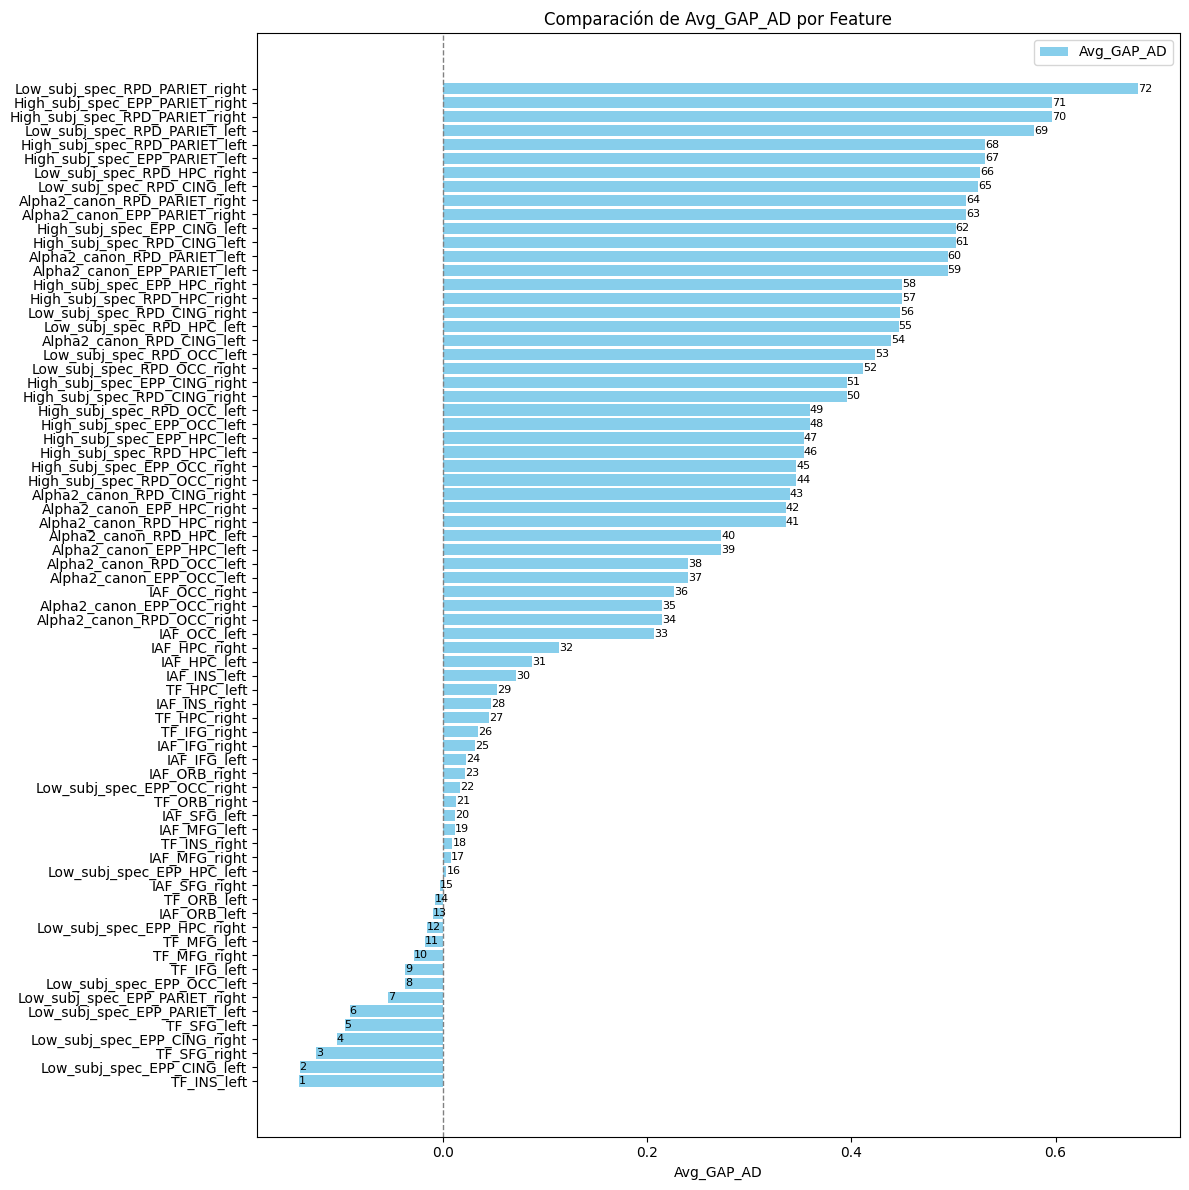

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame cargado
# df = pd.read_excel("results_metrics_all_sin_cuba.xlsx")

# Gráfico de barras para Avg_GAP_AD
plt.figure(figsize=(12, 12))
plt.barh(results_df['Feature'], results_df['Avg_GAP_AD'], color='skyblue', label='Avg_GAP_AD')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Añadir números al lado de cada etiqueta
for i, (feature, value) in enumerate(zip(results_df['Feature'], results_df['Avg_GAP_AD'])):
    plt.text(value, i, f"{i+1}", va='center', ha='left', fontsize=8, color='black')

# Configuración
plt.xlabel('Avg_GAP_AD')
plt.title('Comparación de Avg_GAP_AD por Feature')
plt.legend()
plt.tight_layout()
plt.show()



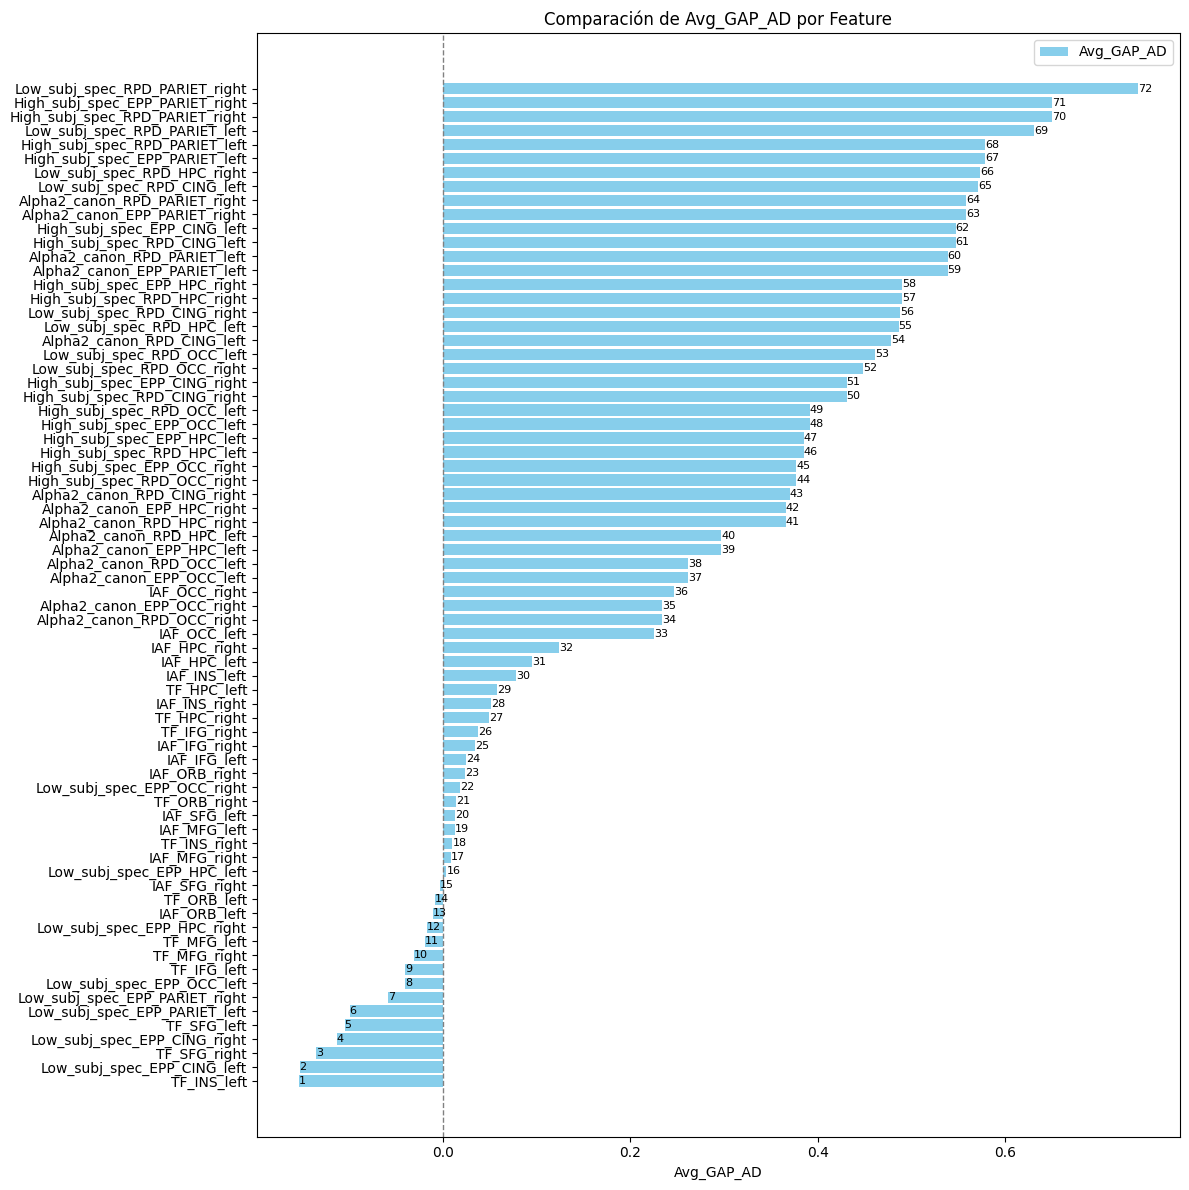

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame cargado
# df = pd.read_excel("results_metrics_all_sin_cuba.xlsx")

# Gráfico de barras para Avg_GAP_AD
plt.figure(figsize=(12, 12))
plt.barh(results_df['Feature'], results_df['Avg_GAP_AD'], color='skyblue', label='Avg_GAP_AD')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Añadir números al lado de cada etiqueta
for i, (feature, value) in enumerate(zip(results_df['Feature'], results_df['Avg_GAP_AD'])):
    plt.text(value, i, f"{i+1}", va='center', ha='left', fontsize=8, color='black')

# Configuración
plt.xlabel('Avg_GAP_AD')
plt.title('Comparación de Avg_GAP_AD por Feature')
plt.legend()
plt.tight_layout()
plt.show()



# Filtro de Metricas

In [42]:
filtered_features_all = results_df.loc[(results_df['Avg_GAP_AD'] > 0.0) , 'Feature']

# Convertir a lista
filtered_features_list_all = filtered_features_all.tolist()

print(filtered_features_list_all)

['Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_

In [93]:
filtered_features_all = results_df.loc[(results_df['Avg_GAP_AD'] > 0.0) , 'Feature']

# Convertir a lista
filtered_features_list_all = filtered_features_all.tolist()

print(filtered_features_list_all)

['Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_O

In [94]:
filtered_features_America = results_df.loc[ (results_df['Avg_GAP_AD_America'] > 0.0), 'Feature']

# Convertir a lista
filtered_features_list_America = filtered_features_America.tolist()

print(filtered_features_list_America)

['Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_O

In [103]:
filtered_features_America_Rel = results_df.loc[ (results_df['Avg_GAP_AD_America_Rel'] > 0.0), 'Feature']

# Convertir a lista
filtered_features_list_America_Rel = filtered_features_America_Rel.tolist()

print(filtered_features_list_America_Rel)

['Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_O

In [95]:
filtered_features_Turquia = results_df.loc[ (results_df['Avg_GAP_AD_Turquia'] > 0.0), 'Feature']

# Convertir a lista
filtered_features_list_Turquia = filtered_features_Turquia.tolist()

print(filtered_features_list_Turquia)

['Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_CING_right', 'IAF_OCC_left', 'TF_IFG_right', 'TF_ORB_right', 'TF_HPC_right', 'IAF_ORB_left', 'IAF_OCC_right', 'TF_INS_right', 'Low_subj_spec_EPP_OCC_right', 'TF_HPC_left']


In [104]:
filtered_features_Turquia_Rel = results_df.loc[ (results_df['Avg_GAP_AD_Turquia_Rel'] > 0.0), 'Feature']

# Convertir a lista
filtered_features_list_Turquia_Rel = filtered_features_Turquia_Rel.tolist()

print(filtered_features_list_Turquia_Rel)

['Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_CING_right', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_left', 'TF_HPC_right', 'IAF_ORB_left', 'IAF_OCC_right', 'Low_subj_spec_EPP_HPC_right', 'TF_MFG_left', 'Low_subj_spec_EPP_OCC_right', 'TF_HPC_left', 'TF_MFG_right']


In [111]:
filtered_features_R2 = results_df.loc[ (results_df['R2'] > 0.0), 'Feature']

# Convertir a lista
filtered_features_list_R2 = filtered_features_R2.tolist()

print(filtered_features_list_R2)

['Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_PARIET_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_O

In [151]:
# Ordenar y seleccionar las 14 mejores características de cada lista
top_14_america = filtered_features_list_America[:25]
top_14_turquia = filtered_features_list_Turquia[:20]
top_14_america_Rel = filtered_features_list_America_Rel[:25]
top_14_turquia_Rel = filtered_features_list_Turquia_Rel[:25]
top_14_all = filtered_features_list_all[:20]
top_14_R2 = filtered_features_list_R2[:14]

# Unir las dos listas y eliminar duplicados
union = list(set( top_14_america  + top_14_america_Rel))

print(union)


['High_subj_spec_RPD_HPC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_HPC_right', 'Low_subj_spec_RPD_OCC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_PARIET_right', 'Alpha2_canon_EPP_PARIET_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_HPC_right', 'Alpha2_canon_RPD_PARIET_right', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_left', 'High_subj_spec_EPP_HPC_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_HPC_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_left']
